In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

,Extent,Date
0,376618.799,1979-01-01
1,211788.726,1979-02-01
2,262868.141,1979-03-01
3,698377.304,1979-04-01
4,1252407.727,1979-05-01
...,...,...
533,1520776.003,2023-06-01
534,2076164.165,2023-07-01
535,2731799.027,2023-08-01
536,3179384.692,2023-09-01


In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 9
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((518, 12, 1), (518,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT9/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2327 - root_mean_squared_error: 0.4824

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 8s 95ms/step - loss: 0.2294 - root_mean_squared_error: 0.4789 - val_loss: 0.1800 - val_root_mean_squared_error: 0.4243
Epoch 2/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1550 - root_mean_squared_error: 0.3938

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.1629 - root_mean_squared_error: 0.4036 - val_loss: 0.1666 - val_root_mean_squared_error: 0.4082
Epoch 3/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1372 - root_mean_squared_error: 0.3704

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1329 - root_mean_squared_error: 0.3645 - val_loss: 0.1503 - val_root_mean_squared_error: 0.3876
Epoch 4/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1061 - root_mean_squared_error: 0.3257

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.1094 - root_mean_squared_error: 0.3307 - val_loss: 0.1330 - val_root_mean_squared_error: 0.3646
Epoch 5/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0909 - root_mean_squared_error: 0.3014

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0890 - root_mean_squared_error: 0.2984 - val_loss: 0.1160 - val_root_mean_squared_error: 0.3406
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0676 - root_mean_squared_error: 0.2599

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0690 - root_mean_squared_error: 0.2627 - val_loss: 0.1040 - val_root_mean_squared_error: 0.3226
Epoch 7/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0551 - root_mean_squared_error: 0.2346

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0535 - root_mean_squared_error: 0.2314 - val_loss: 0.0864 - val_root_mean_squared_error: 0.2940
Epoch 8/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0436 - root_mean_squared_error: 0.2089

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0421 - root_mean_squared_error: 0.2053 - val_loss: 0.0712 - val_root_mean_squared_error: 0.2669
Epoch 9/50
53/53 [==============================] - ETA: 0s - loss: 0.0346 - root_mean_squared_error: 0.1860

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0346 - root_mean_squared_error: 0.1860 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2405
Epoch 10/50
53/53 [==============================] - ETA: 0s - loss: 0.0295 - root_mean_squared_error: 0.1718

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0295 - root_mean_squared_error: 0.1718 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2018
Epoch 11/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0209 - root_mean_squared_error: 0.1444

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0209 - root_mean_squared_error: 0.1447 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1822
Epoch 12/50
52/53 [============================>.] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1348

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1679
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1295

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0167 - root_mean_squared_error: 0.1293 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1294
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1213

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0139 - root_mean_squared_error: 0.1178 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1087
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1308

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0588
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1114

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508
Epoch 17/50
53/53 [==============================] - ETA: 0s - loss: 0.0147 - root_mean_squared_error: 0.1213

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0485
Epoch 18/50
53/53 [==============================] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1294

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0168 - root_mean_squared_error: 0.1294 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0611
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0151 - root_mean_squared_error: 0.1228 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0606
Epoch 22/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0134 - root_mean_squared_error: 0.1158 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763
Epoch 23/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1302

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 4s 86ms/step - loss: 0.0162 - root_mean_squared_error: 0.1275 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0562
Epoch 26/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 27/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0041 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT9\assets


INFO:tensorflow:Assets written to: Indian_model_LT9\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 31/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 32/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0122 - root_mean_squared_error: 0.1103 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 35/50
53/53 [==============================] - 1s 14ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0023 - val_root_mean_square

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.8187740445137024 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

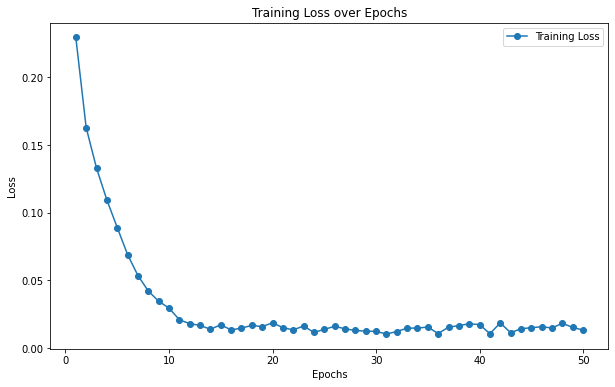

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

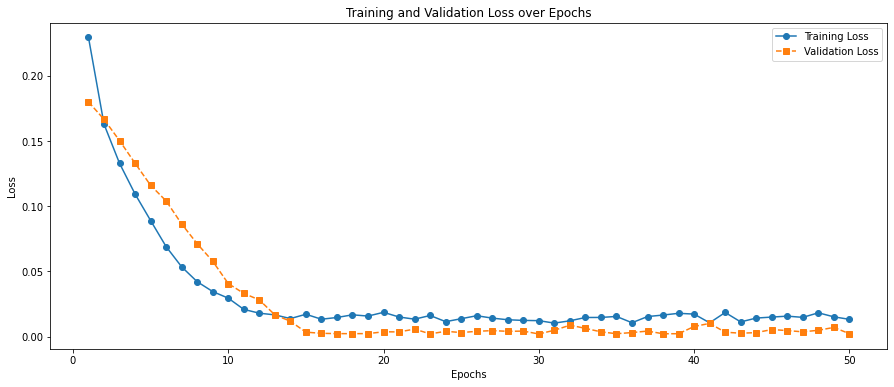

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT9/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 2ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.05434776926297011
MAE : 0.04519095338083107


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,3.491982e+05,522831.371
1,6.827881e+03,346601.304
2,-6.142827e+03,444914.605
3,5.346761e+05,827036.916
4,9.662592e+05,1142021.216
5,1.710150e+06,1885693.654
6,2.497958e+06,2542569.663
7,3.046006e+06,3107373.845
8,3.535805e+06,3488175.444
9,3.412508e+06,3746306.528


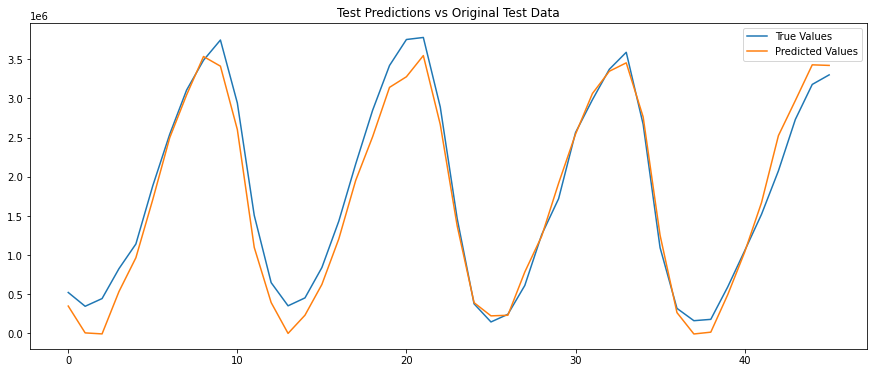

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

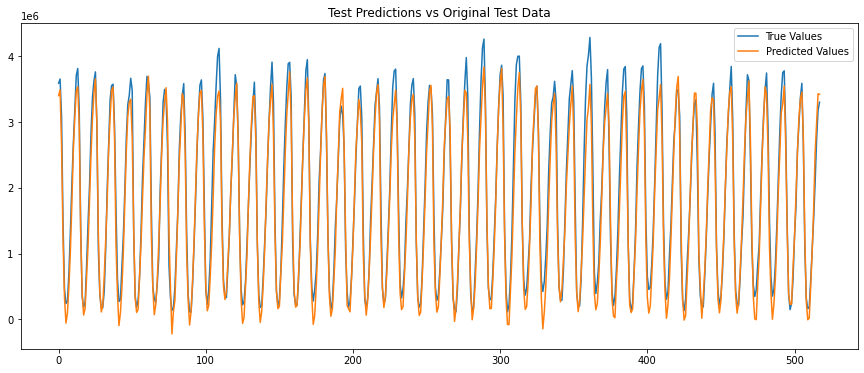

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()